# Finding optimal number of clusters

* Different techniques discussed here are

 - Dendogram

 - Elbow method

 - Silhoutte score Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline

In [5]:
# load the data into dataframe
df = pd.read_csv("beers.csv")
df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


#### Columns Name

- abv  The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol

- ibu   International bittering units, which describe how bitter a drink is.

- id    Unique ID

- name  Name of the beer.

- styleBeer  style (lager, ale, IPA, etc.)

- brewery_id  Unique identifier for brewery that produces this beer; can use to join with brewery info.

- ounces Size of beer in ounces.

In [21]:
df_new = df[['abv','brewery_id']]
df_new.head()

,abv,brewery_id
0,0.050,408
1,0.066,177
2,0.071,177
3,0.090,177
4,0.075,177


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 2 columns):
abv           2348 non-null float64
brewery_id    2410 non-null int64
dtypes: float64(1), int64(1)
memory usage: 37.7 KB


In [23]:
df_new.dropna(inplace=True)

C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X = df_new.values
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

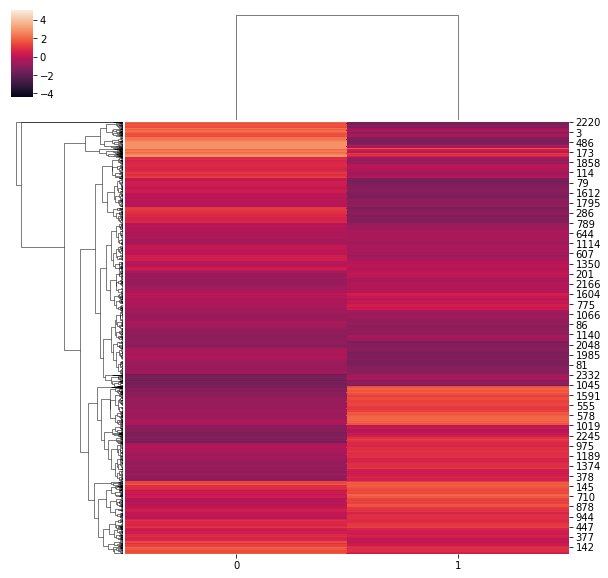

In [25]:
sn.clustermap(X_scaled)

# Elbow Analysis

In [26]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [27]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [28]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,4696.000000,1
1,2891.888571,2
2,1713.484757,3
3,1353.799385,4
4,1080.393195,5
5,910.499388,6
6,787.185800,7
7,692.724944,8
8,618.319689,9
9,555.542578,10


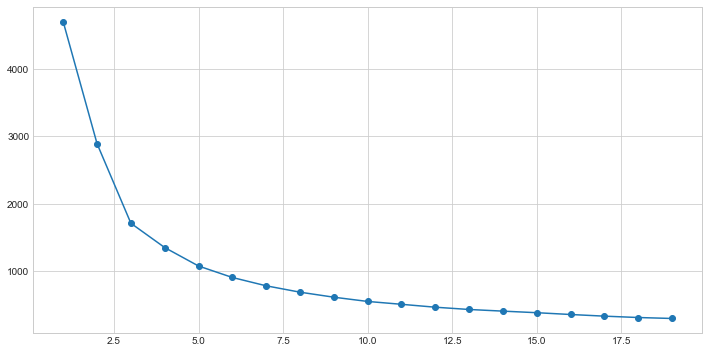

In [33]:
sn.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

# Silhouette Analysis

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.



#### Score closer to 1 means assigned to the cluster correctly.

#### Score closer to -1 is assigned to a wrong cluster.

#### Score close to 0 means the point lies between almost at the boundary of both the clusters.

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.3859507596288521


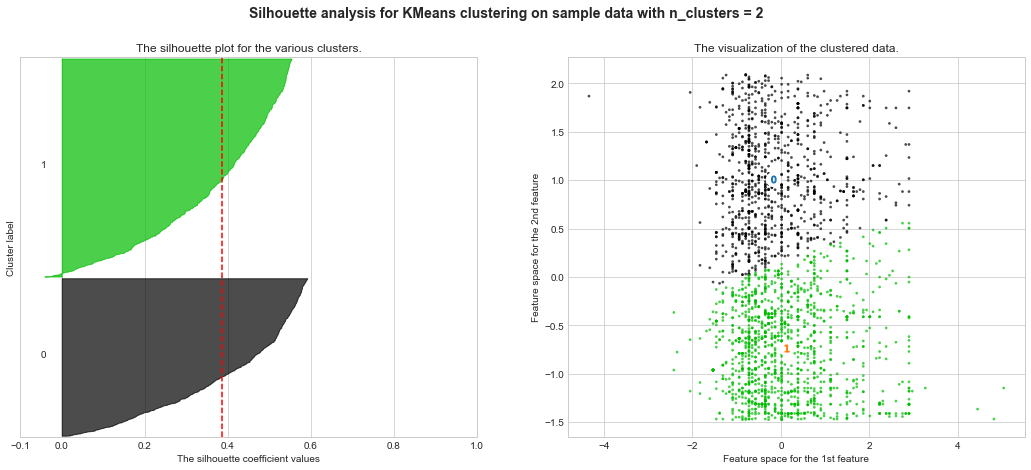

For n_clusters = 3 The average silhouette_score is : 0.4266610871698949


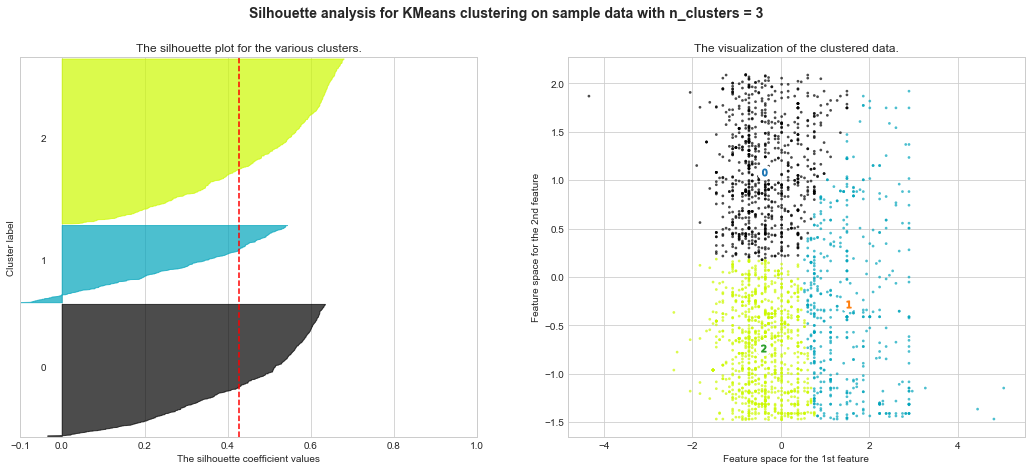

For n_clusters = 4 The average silhouette_score is : 0.410953184367375


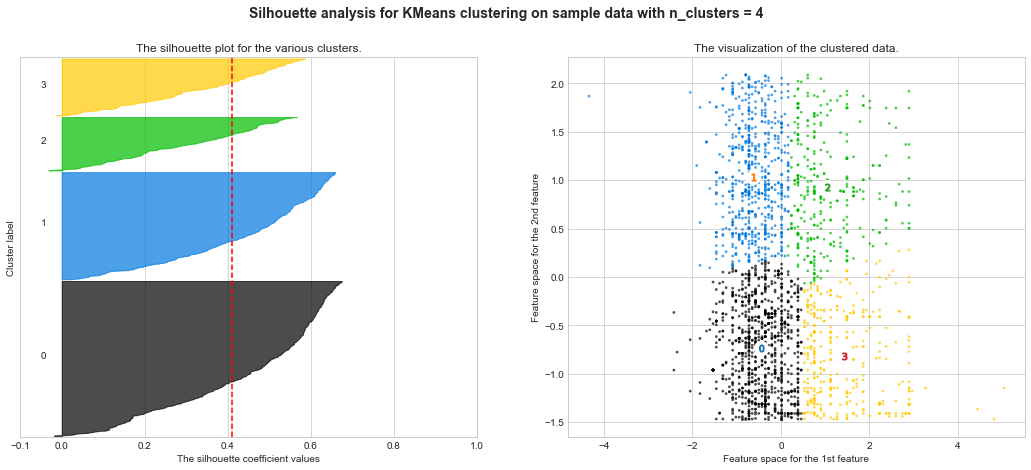

For n_clusters = 5 The average silhouette_score is : 0.37579750715572036


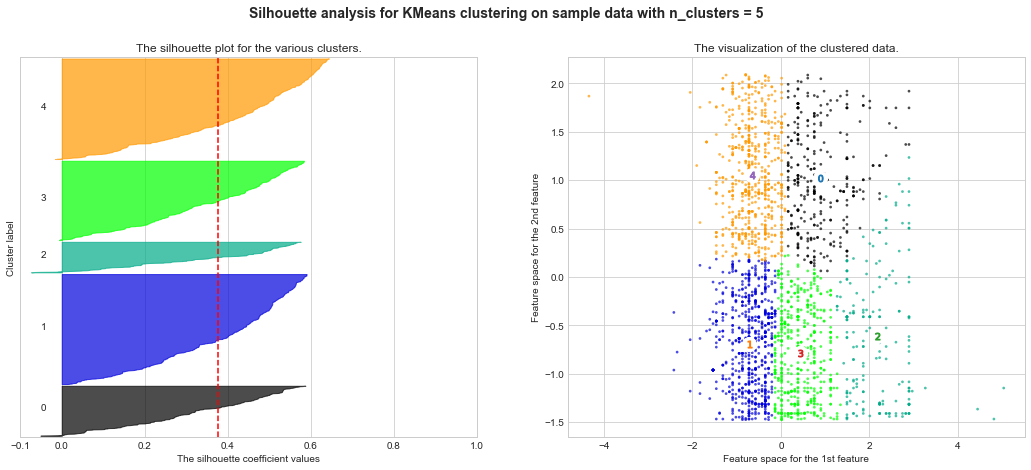

In [41]:
cluster_range = range(2,6)

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)



#
  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()


In [49]:
n_clusters = 8
k = []
s = []
for n_clusters in range(2,20):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X_scaled )
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    s.append(silhouette_avg)
    k.append(n_clusters)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3859507596288521
For n_clusters = 3 The average silhouette_score is : 0.4266610871698949
For n_clusters = 4 The average silhouette_score is : 0.410953184367375
For n_clusters = 5 The average silhouette_score is : 0.37579750715572036
For n_clusters = 6 The average silhouette_score is : 0.359688284480514
For n_clusters = 7 The average silhouette_score is : 0.3622947487727843
For n_clusters = 8 The average silhouette_score is : 0.36282319816293507
For n_clusters = 9 The average silhouette_score is : 0.3583918536881533
For n_clusters = 10 The average silhouette_score is : 0.3579808416499743
For n_clusters = 11 The average silhouette_score is : 0.3587494913108845
For n_clusters = 12 The average silhouette_score is : 0.3598982433151093
For n_clusters = 13 The average silhouette_score is : 0.3543313430425731
For n_clusters = 14 The average silhouette_score is : 0.3588519148987607
For n_clusters = 15 The average silhouette_score is : 0.350

Text(0,0.5,'Shilhoutee Average scores')

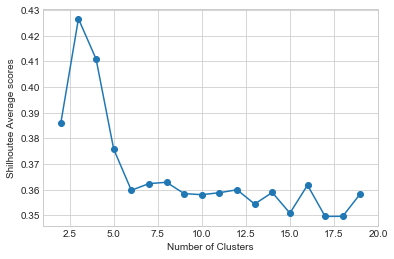

In [54]:
plt.plot(k,s,marker='o')
plt.xlim([1,20])
plt.xlabel('Number of Clusters')
plt.ylabel('Shilhoutee Average scores')